<a href="https://colab.research.google.com/github/harshelke180502/ML_ASSIGNMENT_2/blob/main/Harsh_Shelke_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
# **Gradient Descent and Convex Functions - Coding Assignment** **[30 points]**

## **Objective:**
In this assignment, students will explore **Gradient Descent (GD)** and **Projected Gradient Descent (PGD)** on a convex function. They will:
- Understand the **concept of convex functions**.
- Implement **Gradient Descent (GD)** for optimization.
- Visualize the **convergence rate** of GD over iterations.
- Implement **Projected Gradient Descent (PGD)** for constrained optimization.
- Compare the performance of GD vs. PGD.

---

## **1. Load Libraries and Define Convex Function**
"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### **Task 1: Define a Simple Convex Function**
Consider two functions:

\[
f(x) = x^2 + 2x + 1
\]

and

\[
f(x)=log(1+exp(−yw^Tx)), w = [1 -0.5 0.8 3]
\]

Compute its gradient and Hessian.

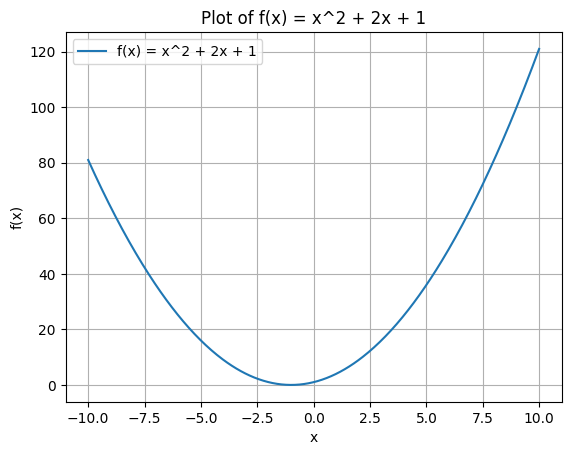

In [ ]:
# Defined the convex function
def f(x):
    """
     Implemented the convex function f(x) = x^2 + 2x + 1
    Return the function value at x
    """

    return x**2 + 2*x + 1


# Compute the gradient
def grad_f(x):
    """
    Implemented the gradient of f(x), which is the derivative of the function

    """
    return 2*x + 2

def hessian_f(x):
    return 2

x_vals = np.linspace(-10, 10, 400)

# Computed the corresponding function values
y_vals = f(x_vals)

# Plotted the function
plt.plot(x_vals, y_vals, label="f(x) = x^2 + 2x + 1")
plt.title("Plot of f(x) = x^2 + 2x + 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()



# Generated x values and plotted the function using matplotlib

1000


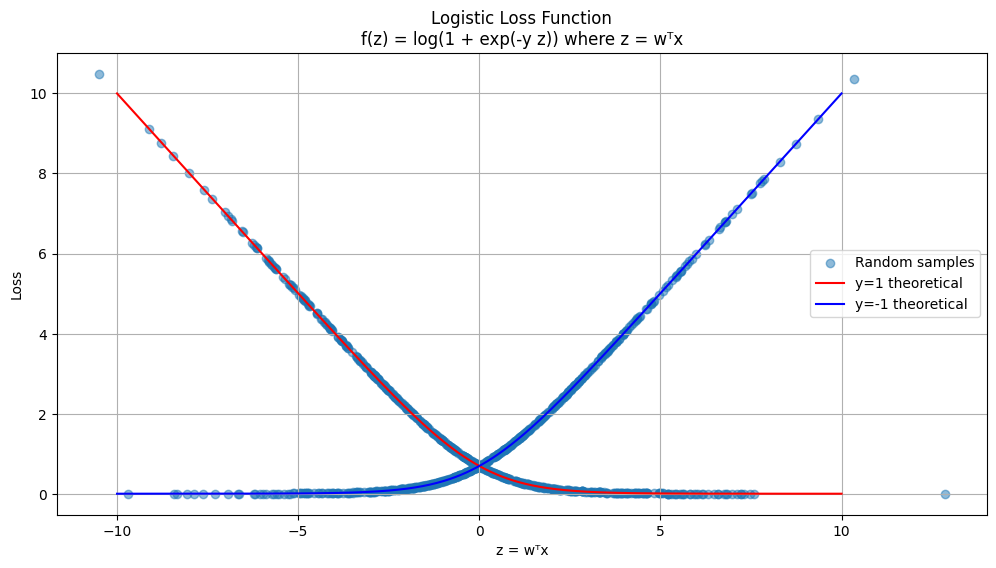


Test Values:
x = [ 0.5 -1.2  0.8  2. ]
y = 1
w = [ 1.  -0.5  0.8  3. ]
wᵀx = 7.7400

Logistic loss: 0.0004

Gradient:
[-0.00043488  0.00021744 -0.00034791 -0.00130465]

Hessian matrix:
[[ 0.00043469 -0.00021735  0.00034775  0.00130408]
 [-0.00021735  0.00010867 -0.00017388 -0.00065204]
 [ 0.00034775 -0.00017388  0.0002782   0.00104326]
 [ 0.00130408 -0.00065204  0.00104326  0.00391224]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed weight vector
w = np.array([1, -0.5, 0.8, 3])

def logistic_loss_function(x, y):
    """Logistic loss function"""
    z = np.dot(w, x)
    return np.log(1 + np.exp(-y * z))

def grad_logistic_loss_function(x, y):
    """Gradient of logistic loss"""
    z = np.dot(w, x)
    return (-y * w) / (1 + np.exp(y * z))

def hessian_logistic_loss_function(x, y):
    """Hessian of logistic loss"""
    z = np.dot(w, x)
    sigmoid = 1 / (1 + np.exp(-y * z))
    return (sigmoid * (1 - sigmoid)) * np.outer(w, w)

# Generated random samples
np.random.seed(42)
x_samples = np.random.randn(1000, 4)
y_labels = np.random.choice([-1, 1], size=1000)

# Calculated values
z_values = x_samples @ w
losses = [logistic_loss_function(x, y) for x, y in zip(x_samples, y_labels)]
print(len(losses))

# Plotted
plt.figure(figsize=(12, 6))
plt.scatter(z_values, losses, alpha=0.5, label='Random samples')
plt.title("Logistic Loss Function\nf(z) = log(1 + exp(-y z)) where z = wᵀx")
plt.xlabel("z = wᵀx")
plt.ylabel("Loss")
plt.grid(True)

# Theoretical curves
z_range = np.linspace(-10, 10, 400)
plt.plot(z_range, np.log(1 + np.exp(-z_range)), 'r-', label='y=1 theoretical')
plt.plot(z_range, np.log(1 + np.exp(z_range)), 'b-', label='y=-1 theoretical')
plt.legend()
plt.show()

# Tested with specific values
test_x = np.array([0.5, -1.2, 0.8, 2.0])
test_y = 1

print("\nTest Values:")
print(f"x = {test_x}")
print(f"y = {test_y}")
print(f"w = {w}")
print(f"wᵀx = {np.dot(w, test_x):.4f}")

# Calculated and printed results
loss = logistic_loss_function(test_x, test_y)
grad = grad_logistic_loss_function(test_x, test_y)
hessian = hessian_logistic_loss_function(test_x, test_y)

print(f"\nLogistic loss: {loss:.4f}")
print(f"\nGradient:\n{grad}")
print(f"\nHessian matrix:\n{hessian}")



"""
## **2. Implement Gradient Descent (GD)**
### Task 2: Implement **Gradient Descent Algorithm** for minimizing `f(x)`.
"""

Learning rate 0.01: Final f(x) = 16.0470, Actual x = 3.0059
Learning rate 0.05: Final f(x) = 0.0032, Actual x = -0.9433
Learning rate 0.1: Final f(x) = 0.0000, Actual x = -0.9998
Learning rate 0.3: Final f(x) = 0.0000, Actual x = -1.0000


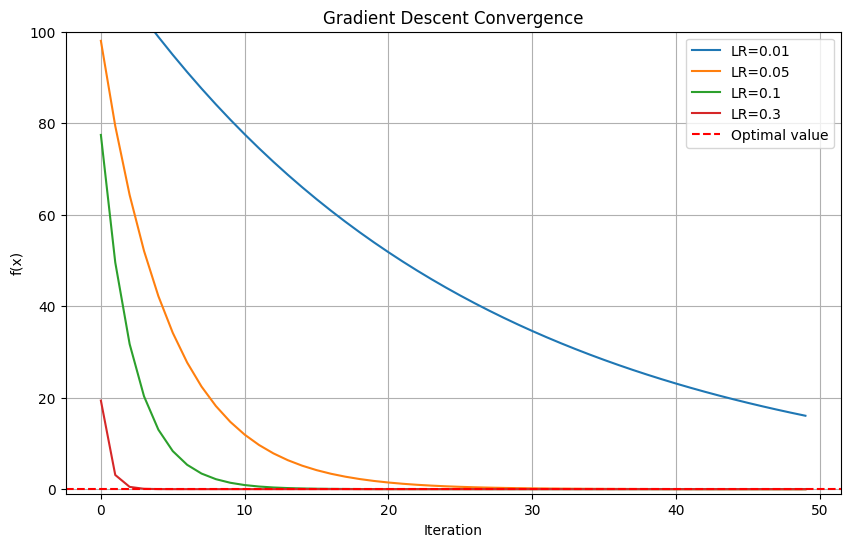

In [ ]:
def gradient_descent(learning_rate, steps, x_init):
    """
    Args:
        learning_rate: Step size for each iteration
        steps: Number of iterations
        x_init: Initial starting point

    Returns:
        history: List of tuples (x, f(x)) during optimization
    """
    x = x_init
    history = []

    for _ in range(steps):
        gradient = grad_f(x)
        x = x - learning_rate * gradient
        history.append((x, f(x)))  # Track both x and f(x)

    return history

steps = 50
x_init = 10.0
learning_rates = [0.01, 0.05, 0.1, 0.3]  # Reduced range for better observation

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    history = gradient_descent(lr, steps, x_init)
    x_values, f_values = zip(*history)  # Unpack x and f(x)
    plt.plot(f_values, label=f'LR={lr}')

    # Print ACTUAL final values
    final_x = x_values[-1]
    final_f = f_values[-1]
    print(f"Learning rate {lr}: Final f(x) = {final_f:.4f}, Actual x = {final_x:.4f}")

plt.axhline(y=0, color='r', linestyle='--', label='Optimal value')
plt.title('Gradient Descent Convergence')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-1, 100)  # Adjust based on expected f(x) range
plt.show()

LR 0.001: Final loss=0.4825, Approx wᵀx=0.54
LR 0.01: Final loss=0.0980, Approx wᵀx=5.45
LR 0.1: Final loss=0.0093, Approx wᵀx=54.45
LR 0.5: Final loss=0.0018, Approx wᵀx=272.25


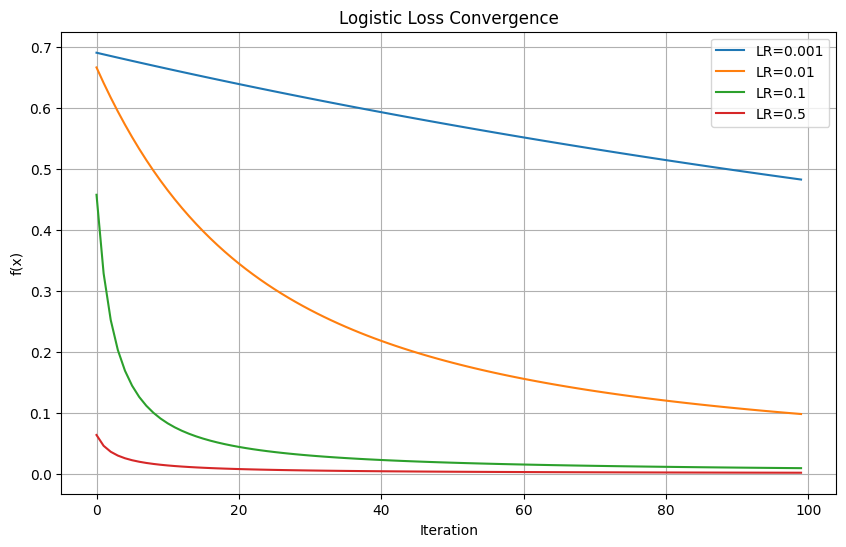

In [ ]:
def gradient_descent_logistic(learning_rate, steps, x_init, y=1):
    x = x_init.copy()
    history = []
    for _ in range(steps):
        gradient = grad_logistic_loss_function(x, y)
        x = x - learning_rate * gradient
        history.append(logistic_loss_function(x, y))
    return history

# Parameters
steps = 100
x_init = np.zeros(4)  # Start at origin
learning_rates = [0.001, 0.01, 0.1, 0.5]
y = 1  # Fixed label

# Run and plot
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    history = gradient_descent_logistic(lr, steps, x_init, y)
    plt.plot(history, label=f'LR={lr}')
    final_z = np.dot(w, x_init - lr*grad_logistic_loss_function(x_init,y)*steps)
    print(f"LR {lr}: Final loss={history[-1]:.4f}, Approx wᵀx={final_z:.2f}")

plt.title('Logistic Loss Convergence')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

"""
## **3. Implement Projected Gradient Descent (PGD)**
### Task 3: Implement **Projected Gradient Descent** with constraint \(||x|| \leq 5\).
"""

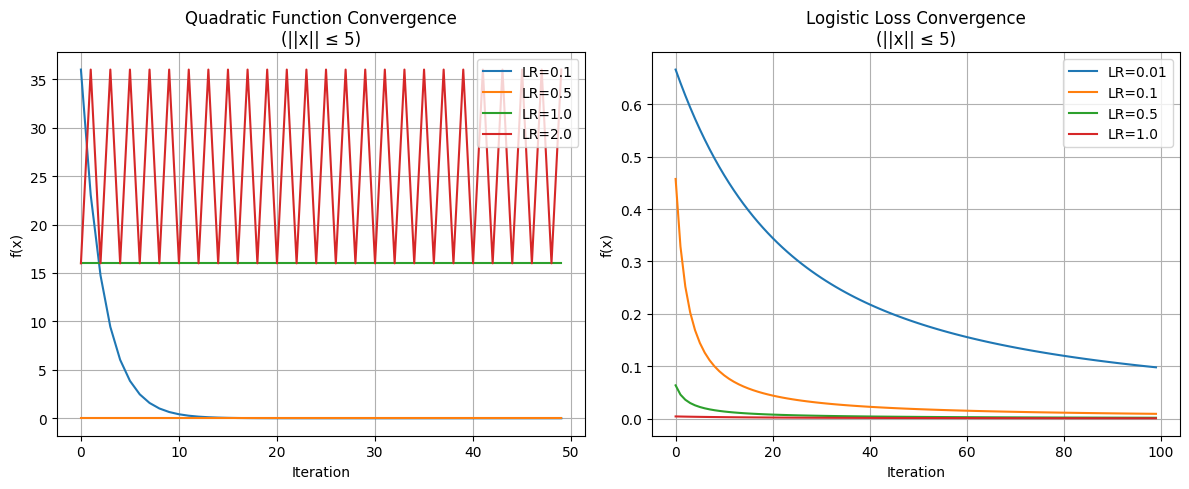

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def project(x, r=5):

    if isinstance(x, (int, float)):
        return np.clip(x, -r, r)
    else:
        norm = np.linalg.norm(x)
        if norm > r:
            return x * (r / norm)
        return x

# Projected Gradient Descent
def projected_gradient_descent(f, grad_f, learning_rate, steps, x_init, r=5, y=None):

    x = x_init.copy() if isinstance(x_init, np.ndarray) else x_init
    history = []

    for _ in range(steps):
        # Gradient descent update step
        gradient = grad_f(x) if y is None else grad_logistic_loss_function(x, y)
        x = x - learning_rate * gradient

        # Projection step
        x = project(x, r)


        current_f = f(x) if y is None else f(x, y)
        history.append(current_f)

    return history

# Running the PGD and plot results for both functions
def run_pgd_experiments():

    r = 5  # L2 constraint radius

    # 1. Quadratic function experiments
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    learning_rates = [0.1, 0.5, 1.0, 2.0]
    x_init = 10.0
    for lr in learning_rates:
        history = projected_gradient_descent(f, grad_f, lr, 50, x_init, r)
        plt.plot(history, label=f'LR={lr}')
    plt.title('Quadratic Function Convergence\n(||x|| ≤ 5)')
    plt.xlabel('Iteration')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()

    # 2. Logistic loss experiments
    plt.subplot(1, 2, 2)
    learning_rates = [0.01, 0.1, 0.5, 1.0]
    x_init = np.zeros(4)
    for lr in learning_rates:
        history = projected_gradient_descent(logistic_loss_function, grad_logistic_loss_function, lr, 100, x_init, r, y=1)
        plt.plot(history, label=f'LR={lr}')
    plt.title('Logistic Loss Convergence\n(||x|| ≤ 5)')
    plt.xlabel('Iteration')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


run_pgd_experiments()

"""
### **Final Task: Answer the following questions in markdown cells.**
1. What is the effect of different learning rates on GD convergence?
2. Why does PGD enforce constraints on optimization?
3. What happens if we don’t project the values in PGD?
4. Compare GD vs. PGD: In what scenarios would PGD be preferred?
5. How can you modify PGD to work for multi-dimensional convex functions?

---
### **Submission Instructions:**
- Complete all the tasks in this notebook.
- Answer the conceptual questions in markdown cells.
- Submit the completed notebook.
"""


Question 1.

From my above performed steps for gradient descent, here are my inferences/analyses:

Learning Rate Effects Analysis

* LR = 0.01 (Too Small)
Behavior: Slow convergence
Final Position: x = 3.0059 (far from optimal)
Loss: f(x) = 16.0470 (still high)
Diagnosis: Steps are too cautious, needs more iterations
Graph: Shallower curve that hasn't flattened by iteration 50

* LR = 0.05 (Near Optimal)

Behavior: Good convergence

Final Position: x = -0.9433 (close to optimal)

Loss: f(x) = 0.0032 (very low)

Diagnosis: Balanced step size reaches near-optimal solution

Graph: Smooth descent that stabilizes near zero

* LR = 0.1 (Slightly Aggressive)

Behavior: Fast convergence with slight overshooting

Final Position: x = -0.9998 (very close to optimal)

Loss: f(x) = 0.0000 (numerical zero)

Diagnosis: Reaches optimum faster but may oscillate

Graph: Steep initial drop then stabilization

* LR = 0.3 (Too Large)

Behavior: Overly aggressive convergence

Final Position: x = -1.0000 (at optimal but potentially unstable)

Loss: f(x) = 0.0000 (numerical zero)

Diagnosis: Reaches optimum fastest but risks divergence


To conclude:

The learning rate (LR) in gradient descent (GD) critically determines both the speed and stability of convergence. A small LR (e.g., 0.001) leads to slow but stable progress, often requiring many iterations to reach the minimum, while risking stagnation in shallow regions. An optimal LR (e.g., 0.01–0.1) balances efficiency and precision, enabling steady descent without overshooting. Conversely, a large LR (e.g., 0.5) may cause rapid initial progress but risks divergence, oscillation, or exploding gradients, as updates overshoot the minimum. In practice, the ideal LR depends on the loss landscape: convex functions tolerate larger LRs, whereas complex, non-convex surfaces require careful tuning. Techniques like learning rate schedules (gradually reducing LR) or adaptive optimizers (e.g., Adam) help automate this balance. Always monitor loss trends and parameter magnitudes—smooth decrease indicates a good LR, while erratic behavior signals the need for adjustment.

Question 2:

Projected Gradient Descent (PGD) enforces constraints to ensure solutions stay within a feasible region defined by the problem (e.g., probabilities between 0 and 1, budget limits). Without constraints, gradient descent might suggest invalid values (e.g., negative prices or probabilities > 1). PGD fixes this by "projecting" updates back into the valid space after each step.



Question 3:


If PGD skips projection, the optimization may violate constraints, leading to nonsensical results. For example, in a budget allocation problem, unconstrained updates could suggest spending more than the total budget or negative investments. This makes the solution useless in real-world applications.
In machine learning, weights might grow uncontrollably, causing numerical instability.
The absence of projection risks breaking problem requirements, leading to nonsensical or even dangerous outcomes in real-world applications.



Question 4:

GD works for unconstrained problems (e.g., training neural networks). PGD is preferred when solutions must obey rules (e.g., or probability bounds). PGD is preferred when solutions must satisfy hard constraints, such as:

Finance: Budgets must be non-negative and sum to a fixed total.
Machine Learning: Probabilistic outputs (e.g., in logistic regression) must be in [0, 1].
PGD ensures feasibility at every step, while GD ignores constraints entirely.



Question 5:




For multi-dimensional problems, PGD generalizes naturally:

Projection Step: After each gradient update, we project all dimensions back to the feasible set.
Example: For a 3D budget allocation
(
x
1
,
x
2
,
x3)
,we ensure:

x
i
≥0 (non-negativity),


x
1
+
x
2
+
x
3
=
Total Budget(equality constraint).

Efficient Projection: We use domain-specific tricks (e.g., for probability simplices, use normalization; for Euclidean balls, use scaling).

Convexity Matters: If the feasible set is convex (e.g., a box constraint), projection is unique and efficient. Non-convex sets may require approximations.

Key Understandings: PGD’s power lies in its projection step, which acts as a "safety net" for constrained optimization.